In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score


In [6]:

dataset1 = pd.read_csv("data/fall_detection_dataset_video1.csv")
dataset2 = pd.read_csv("data/fall_detection_dataset_video2.csv")
dataset3 = pd.read_csv("data/fall_detection_dataset_video3.csv")

combined_dataset = pd.concat([dataset1, dataset2, dataset3], ignore_index=True)

combined_dataset.head()


,track_id,frame,area,aspect_ratio,area_change_avg,area_change_std,aspect_ratio_change_avg,aspect_ratio_change_std,aspect_ratio_avg,aspect_ratio_std,class
0,2,1.0,12006,0.396552,0.0,0.0,0.0,0.0,0.396552,0.0,0.0
1,2,2.0,12006,0.396552,0.0,0.0,0.0,0.0,0.396552,0.0,0.0
2,2,3.0,11832,0.390805,0.0,0.0,0.0,0.0,0.390805,0.0,0.0
3,2,4.0,12006,0.396552,0.0,0.0,0.0,0.0,0.396552,0.0,0.0
4,2,5.0,12006,0.396552,0.0,0.0,0.0,0.0,0.396552,0.0,0.0


In [7]:
X = combined_dataset.drop(columns=["track_id", "frame", "class"])  
y = combined_dataset["class"]  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
weak_learner = DecisionTreeClassifier(criterion='entropy', max_depth=1)

adaboost_model = AdaBoostClassifier(estimator=weak_learner, n_estimators=50, learning_rate=1.0, random_state=42)

adaboost_model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=1),
                   random_state=42)

In [11]:
y_pred = adaboost_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9948849104859335

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       162
         1.0       1.00      0.99      1.00       229

    accuracy                           0.99       391
   macro avg       0.99      1.00      0.99       391
weighted avg       0.99      0.99      0.99       391



In [12]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(adaboost_model, X_scaled, y, cv=5)
print("Cross-validated Accuracy:", np.mean(scores))


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R

Cross-validated Accuracy: 0.9651505016722408


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


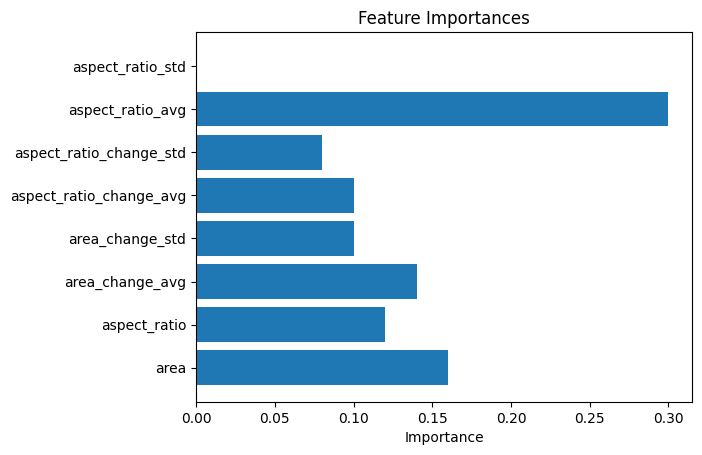

In [13]:
import matplotlib.pyplot as plt

feature_importances = adaboost_model.feature_importances_
feature_names = combined_dataset.drop(columns=["track_id", "frame", "class"]).columns
plt.barh(feature_names, feature_importances)
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.show()


In [14]:
import joblib

joblib.dump(adaboost_model, "adaboost_fall_detector.pkl")

['adaboost_fall_detector.pkl']